In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\ahsan\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ahsan\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ahsan\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ahsan\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed tw

In [2]:
titanic = pd.read_csv("./train.csv")

## Getting Data Information 


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data set has 891 rows and 12 attributes. 

## Missing Data

In [4]:
print("Missing Values in Age: {}".format(titanic['PassengerId'].count()-titanic['Age'].count()))
print("Missing Values in Cabin: {}".format(titanic['PassengerId'].count()-titanic['Cabin'].count()))
print("Missing Values in Embarked: {}".format(titanic['PassengerId'].count()-titanic['Embarked'].count()))

Missing Values in Age: 177
Missing Values in Cabin: 687
Missing Values in Embarked: 2


## Data Formatting Problems

The data is incorrectly formatted for the given attributes. 

In [5]:
titanic['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

The Ticket ID has characters like A/5, PC, STON/02 and W./C. appended to random entries but these characters are not present in all entries of the Ticket ID attribute. 

In [6]:
titanic['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
E101           3
              ..
C103           1
B73            1
D21            1
D7             1
A10            1
Name: Cabin, Length: 147, dtype: int64

There are Passengers that were allocated more than one cabin.

## Bar Chart of Passenger Class

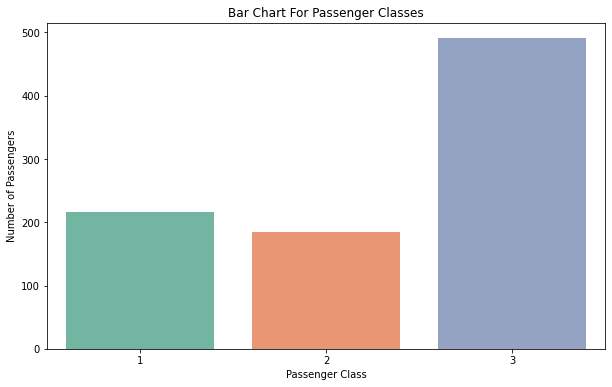

In [7]:
plt.figure(figsize=(10,6))
plt.title("Bar Chart For Passenger Classes")
sns.countplot(x=titanic['Pclass'],palette="Set2")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.show()

In [8]:
pclass=titanic['Pclass'].value_counts()
print("Upper Class  : {}".format(pclass[1]))
print("Middle Class : {}".format(pclass[2]))
print("Lower Class  : {}".format(pclass[3]))

Upper Class  : 216
Middle Class : 184
Lower Class  : 491


## Histogram Of Passenger Ages


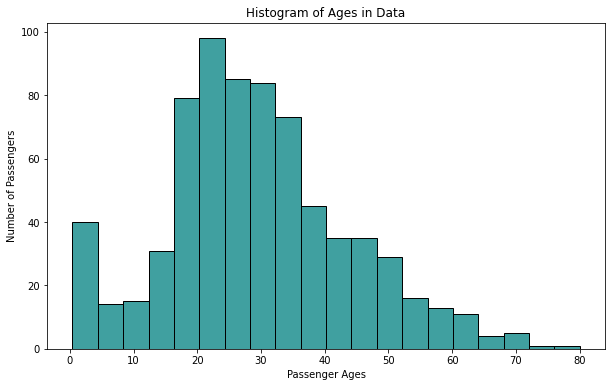

In [9]:
plt.figure(figsize=(10,6))
plt.title("Histogram of Ages in Data")
ages=pd.notnull(titanic['Age'])
sns.histplot(titanic.Age[ages],color='teal')
plt.xlabel("Passenger Ages")
plt.ylabel("Number of Passengers")
plt.show()

In [10]:
age_stats=titanic.Age[ages].describe()
age_stats

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
print("Mean Passenger Age : {}".format(int(age_stats['mean'])))
print("Standard Deviation of Passenger Age : {}".format(int(age_stats['std'])))

Mean Passenger Age : 29
Standard Deviation of Passenger Age : 14


## Five Number Summary of Passenger Age

In [12]:
print("Minimum Age in Data : {}".format(age_stats['min']))
print("First Quartile (Q1) : {}".format(age_stats['25%']))
print("Median         (Q2) : {}".format(age_stats['50%']))
print("Third Quartile (Q3) : {}".format(age_stats['75%']))
print("Maximum Age in Data : {}".format(age_stats['max']))



Minimum Age in Data : 0.42
First Quartile (Q1) : 20.125
Median         (Q2) : 28.0
Third Quartile (Q3) : 38.0
Maximum Age in Data : 80.0


## Box Plot of Passenger Age

C:\Users\ahsan\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


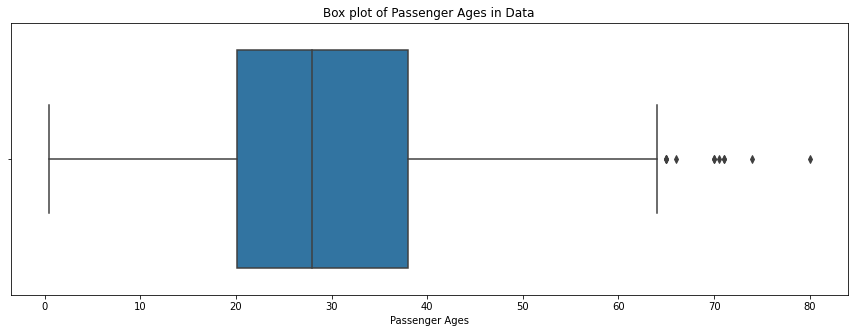

In [13]:
plt.figure(figsize=(15,5))
plt.title("Box plot of Passenger Ages in Data")
ages=pd.notnull(titanic['Age'])
sns.boxplot(titanic.Age[ages])
plt.xlabel("Passenger Ages")
plt.show()

## Parents and Childeren Passengers Data Histogram

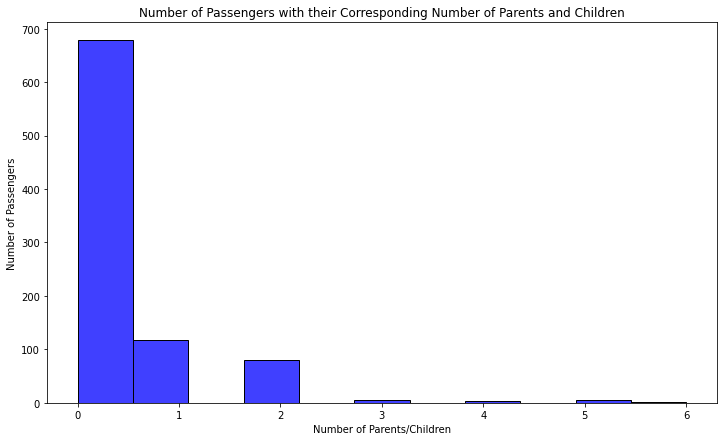

In [73]:
plt.figure(figsize=(12,7))
plt.title("Number of Passengers with their Corresponding Number of Parents and Children")
sns.histplot(titanic['Parch'],color='b')
plt.xlabel("Number of Parents/Children")
plt.ylabel("Number of Passengers")
plt.show()

In [77]:
num_parch=titanic['Parch']
num_parch_counts=num_parch.value_counts()

In [82]:

for index,num_pc in enumerate(num_parch_counts):
    print("{}  Passengers have {} parents/children".format(num_pc,index))

678  Passengers have 0 parents/children
118  Passengers have 1 parents/children
80  Passengers have 2 parents/children
5  Passengers have 3 parents/children
5  Passengers have 4 parents/children
4  Passengers have 5 parents/children
1  Passengers have 6 parents/children


In [14]:
num_sibsp=titanic['SibSp']
num_sibsp_counts=num_sibsp.value_counts()
for index,num_pc in enumerate(num_sibsp_counts):
    print("{}  Passengers have {} siblings/spouse".format(num_pc,index))

608  Passengers have 0 siblings/spouse
209  Passengers have 1 siblings/spouse
28  Passengers have 2 siblings/spouse
18  Passengers have 3 siblings/spouse
16  Passengers have 4 siblings/spouse
7  Passengers have 5 siblings/spouse
5  Passengers have 6 siblings/spouse


In [15]:
num_em=titanic['Embarked']
c=['S','C','Q']
num_em_counts=num_em.value_counts()
for index,num_pc in enumerate(num_em_counts):
    print("{}  Passengers were from {} siblings/spouse".format(num_pc,c[index]))

644  Passengers have 0 siblings/spouse
168  Passengers have 1 siblings/spouse
77  Passengers have 2 siblings/spouse


## Passenger Gender Vs Survival Outcome


c:\users\ahsan\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


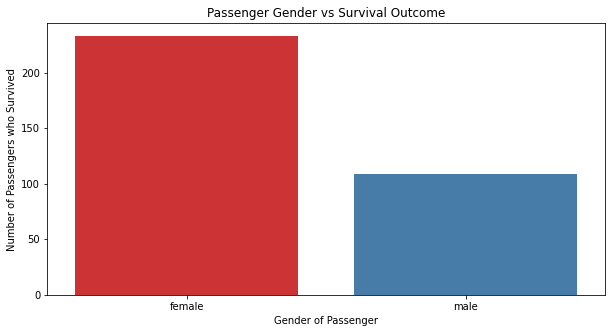

In [96]:
survival= titanic[titanic['Survived']==1]
survival=survival[pd.notnull(survival['Sex'])]
plt.figure(figsize=(10,5))
plt.title("Passenger Gender vs Survival Outcome")
sns.countplot(survival['Sex'],palette="Set1")
plt.xlabel("Gender of Passenger")
plt.ylabel("Number of Passengers who Survived")
plt.show()

In [98]:
gen_survival=survival["Sex"].value_counts()
print("Number of females who survived: {}".format(gen_survival['female']))
print("Number of males   who survived: {}".format(gen_survival['male']))

Number of females who survived: 233
Number of males   who survived: 109


## Number of Passengers with Parents and Children who Survived

c:\users\ahsan\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


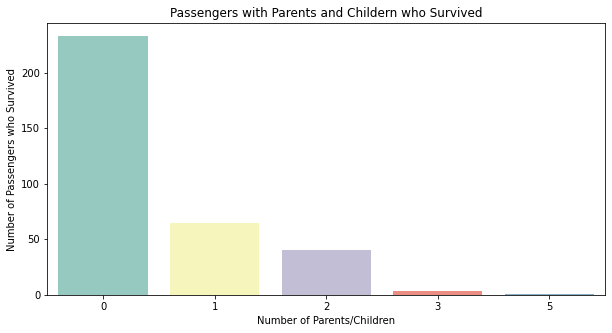

In [99]:
survival_pc=survival[pd.notnull(survival['Parch'])]
plt.figure(figsize=(10,5))
plt.title("Passengers with Parents and Childern who Survived")
sns.countplot(survival_pc['Parch'],palette="Set3")
plt.xlabel("Number of Parents/Children")
plt.ylabel("Number of Passengers who Survived")
plt.show()

In [101]:
survival_pc_counts=survival_pc['Parch'].value_counts()
survival_pc_counts

0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

In [102]:
for index,passengers in enumerate(survival_pc_counts):
    print("Number of Passengers with {} parents/children who survived : {}".format(index,passengers))

Number of Passengers with 0 parents/children who survived : 233
Number of Passengers with 1 parents/children who survived : 65
Number of Passengers with 2 parents/children who survived : 40
Number of Passengers with 3 parents/children who survived : 3
Number of Passengers with 4 parents/children who survived : 1
